In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
df = pd.read_csv('data/son_data.csv')
df.head()

,title,description
0,"한국인 스타 EPL 손흥민-NFL 구영회, 10월 런던에서 만난다",한국인 스포츠 스타인 잉글랜드 프로축구 프리미어리그(EPL)의 손흥민(29·토트넘)...
1,손흥민-구영회 두 한국인 스타 10월에 만난다,잉글랜드 프로축구 토트넘의 손흥민(29)과 미국프로풋볼(NFL) 애틀란타 팰컨스 구...
2,"EPL 손흥민-NFL 구영회, 10월 만남 기대",잉글랜드 프로축구 프리미어리그(EPL)의 손흥민(29·토트넘 홋스퍼)과 미국프로풋볼...
3,"토트넘, 손흥민 한 시즌 최다 골 조명…최고 기록 썼다",잉글랜드 프로축구 토트넘이 손흥민(29)의 개인 한 시즌 공식전 최다 득점 기록을 ...
4,"손흥민·구영회, 한국 최고 Football 스타들 10월 만난다",매경닷컴 MK스포츠 박찬형 기자 손흥민(29·토트넘 홋스퍼)과 구영회(27·애틀랜타...


In [3]:
# 결측치 확인
df.isna().sum()

title          0
description    0
dtype: int64

### 한글 정제

In [4]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 - 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 정재한다.(위 정규식에 위배되는 것들은 길이 0인 문자열로 변환)
    result = hangul.sub('', text)
    return result

In [5]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['description'] = df['description'].apply(lambda x : text_cleaning(x))

df

,title,description
0,한국인 스타 손흥민 구영회 월 런던에서 만난다,한국인 스포츠 스타인 잉글랜드 프로축구 프리미어리그의 손흥민토트넘과 미국프로풋볼의 ...
1,손흥민구영회 두 한국인 스타 월에 만난다,잉글랜드 프로축구 토트넘의 손흥민과 미국프로풋볼 애틀란타 팰컨스 구영회애틀랜타 팰컨...
2,손흥민 구영회 월 만남 기대,잉글랜드 프로축구 프리미어리그의 손흥민토트넘 홋스퍼과 미국프로풋볼의 구영회 애틀랜타...
3,토트넘 손흥민 한 시즌 최다 골 조명최고 기록 썼다,잉글랜드 프로축구 토트넘이 손흥민의 개인 한 시즌 공식전 최다 득점 기록을 조명했다...
4,손흥민구영회 한국 최고 스타들 월 만난다,매경닷컴 스포츠 박찬형 기자 손흥민토트넘 홋스퍼과 구영회애틀랜타 팰컨스 축구 애틀랜...
...,...,...
995,개인 최다 골 손흥민 팀 내 위 평점 점,손흥민 토트넘 핫스퍼이 로 울고 또 웃었다 손흥민은 일한국시간 영국 런던 토트넘 핫...
996,안철수 국민의힘과는 손흥민케인 같은 관계,국민의당 안철수 서울시장 후보가 일 국민의힘 오세훈 후보와의 협력 관계를 잉글랜드 ...
997,손흥민 빛바랜 리그 호 골 토트넘 리즈에 완패위 위태,해리 케인 손흥민 가레스 베일 델레 알리 지오반니 로 셀소 피에르에밀 호이비에르 세...
998,서른살 감독님 환영선물 손흥민 호골 터뜨렸다,메이슨 감독 첫경기 손흥민 호골로 리그 개인 최다골 잉글랜드 프로축구 토트넘의 손흥...


In [6]:
# 말뭉치 생성을 위해 모든 문장을 하나의 문장으로 합친다.
title_corpus = ''.join(df['title'])
content_corpus = ''.join(df['description'])

# 손흥민 단어를 제거한다.
title_corpus = title_corpus.replace('손흥민', '')
content_corpus = content_corpus.replace('손흥민', '')

# content_corpus

In [7]:
tagger = Okt()

# 명사만 추출한다.
title_nouns = tagger.nouns(title_corpus)
content_nouns = tagger.nouns(content_corpus)

# print(title_nouns)
# print(content_nouns)

In [8]:
# 각 단어에 대한 빈도수를 계산한다.
title_count = Counter(title_nouns)
content_count = Counter(content_nouns)

# print(title_count)
# print(content_count)

### 키워드 다듬기

In [9]:
# 워드 클라우드는 두 글자 이상만 인식할 수 있기 때문에
# 두글자 이상인 것만 남겨둔다.
print(len(title_count))
print(len(content_count))

title_dict = {}
for key in title_count :
    # 이름이 1보다 크다면 담아준다.
    if len(key) > 1 :
        title_dict[key] = title_count[key]

content_dict = {}
for key in content_count :
    if len(key) > 1 :
        content_dict[key] = content_count[key]

# 다시 Counter 객체로 생성한다.
remove_title_count = Counter(title_dict)
remove_content_count = Counter(content_dict)

print(len(remove_title_count))
print(len(remove_content_count))

1167
1977
1001
1728


### 워드클라우드

In [10]:
# 가장 빈도수가 높은 단어 100개를 선정한다.
ranked_title_tags = remove_title_count.most_common(100)
ranked_content_tags = remove_content_count.most_common(100)

In [11]:
# 워드 클라우드를 위한 단어 사전을 생성한다.
title_tag_list = pytagcloud.make_tags(ranked_title_tags)
content_tag_list = pytagcloud.make_tags(ranked_content_tags)

In [12]:
pytagcloud.create_tag_image(title_tag_list, 'son_title_word.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

In [13]:
pytagcloud.create_tag_image(content_tag_list, 'son_content_word.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

title


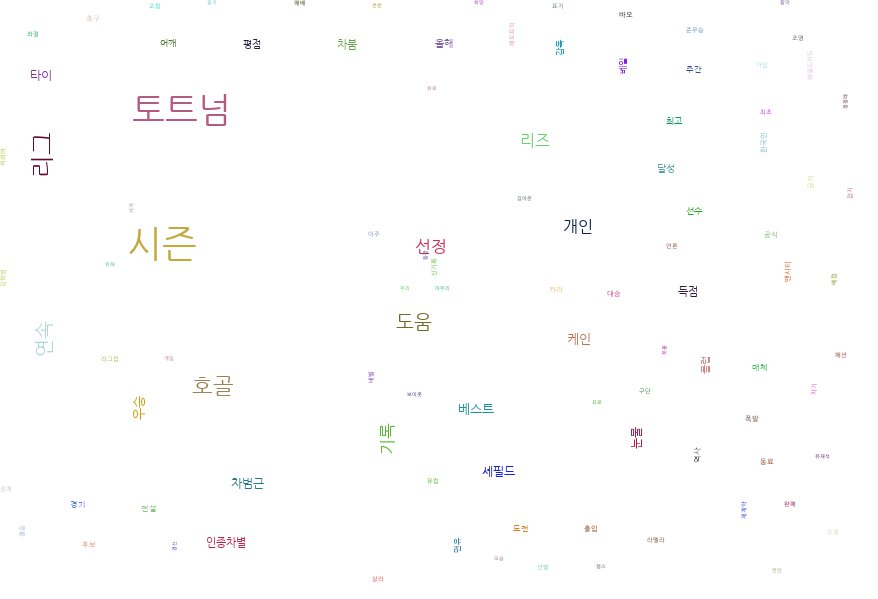

In [14]:
print('title')
Image(filename='son_title_word.jpg')

description


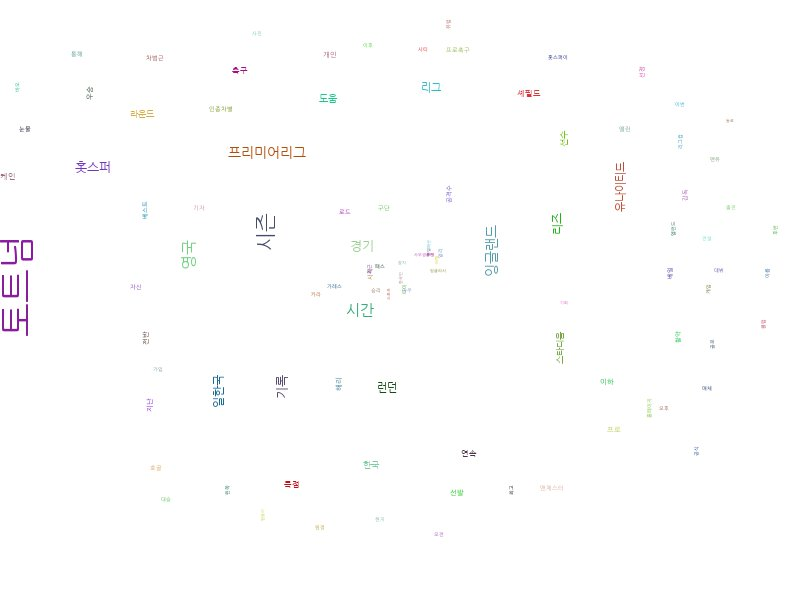

In [15]:
print('description')
Image(filename='son_content_word.jpg')